In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('data.csv')

In [ ]:
data.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


In [ ]:
data.isnull().sum()

,0
Date,0
Local Route,0
Light Rail,0
Peak Service,0
Rapid Route,0
School,0
Other,20


In [ ]:
data['Other']=data['Other'].fillna(data['Local Route'])

In [ ]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1918 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB
None
        Local Route    Light Rail  Peak Service   Rapid Route       School  \
count   1918.000000   1918.000000   1918.000000   1918.000000  1918.000000   
mean    9891.395203   7195.446298    179.581335  12597.213243  2352.694995   
std     6120.715714   3345.616428    156.532738   6720.494557  2494.766306   
min        1.000000      0.000000      0.000000      0.000000     0.000000   
25%     3044.500000   4463.500000      0.000000 

In [ ]:
from datetime import datetime

data['Date']=pd.to_datetime(data['Date'])
data['Day']=data['Date'].dt.day
data['Month']=data['Date'].dt.month
data['Year']=data['Date'].dt.year
data['Day Name']= data['Date'].dt.day_name()
data['Month Name']=data['Date'].dt.month_name()

print(data[['Date', 'Day', 'Month', 'Year', 'Day Name', 'Month Name']])

           Date  Day  Month  Year   Day Name Month Name
0    2024-08-30   30      8  2024     Friday     August
1    2023-09-15   15      9  2023     Friday  September
2    2021-12-28   28     12  2021    Tuesday   December
3    2023-01-11   11      1  2023  Wednesday    January
4    2021-09-11   11      9  2021   Saturday  September
...         ...  ...    ...   ...        ...        ...
1913 2023-01-19   19      1  2023   Thursday    January
1914 2023-08-16   16      8  2023  Wednesday     August
1915 2022-01-10   10      1  2022     Monday    January
1916 2020-05-04    4      5  2020     Monday        May
1917 2023-07-26   26      7  2023  Wednesday       July

[1918 rows x 6 columns]


<ipython-input-7-0767ec9869eb>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date']=pd.to_datetime(data['Date'])


In [ ]:
local_route_distribution=data['Local Route'].value_counts()
print("Local Route Distribution:")
print(local_route_distribution)

Local Route Distribution:
Local Route
2035     5
13366    4
2086     3
3687     3
15462    3
        ..
16131    1
2876     1
16283    1
15801    1
16680    1
Name: count, Length: 1794, dtype: int64


In [ ]:
integer_columns=data.select_dtypes(include=['int64']).columns
correlation_matrix=data[integer_columns].corr()
print(correlation_matrix)

              Local Route  Light Rail  Peak Service  Rapid Route    School
Local Route      1.000000    0.918795      0.944390     0.965122  0.852356
Light Rail       0.918795    1.000000      0.879347     0.967736  0.685795
Peak Service     0.944390    0.879347      1.000000     0.944997  0.728795
Rapid Route      0.965122    0.967736      0.944997     1.000000  0.754290
School           0.852356    0.685795      0.728795     0.754290  1.000000


In [ ]:
data['Date']=pd.to_datetime(data['Date'])
light_rail_trends=data.groupby('Date')['Light Rail'].sum()

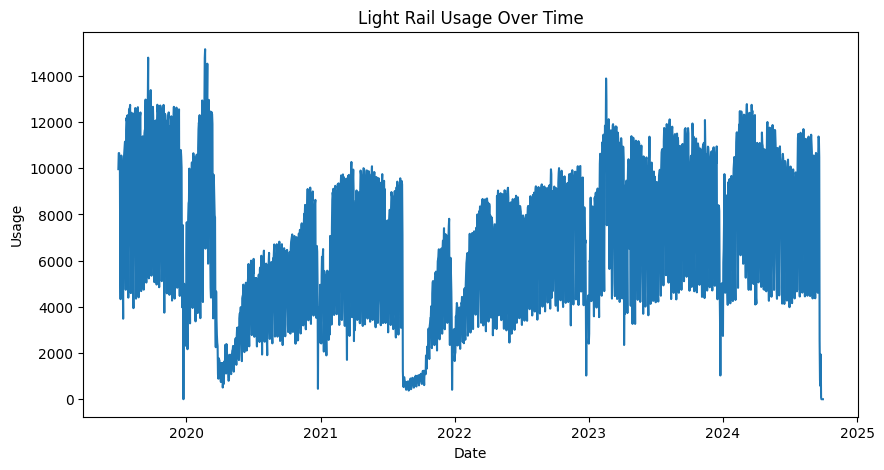

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(light_rail_trends)
plt.title('Light Rail Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Usage')
plt.show()

In [ ]:
average_school_usage = data['School'].mean()
print(f"Average School Route Usage: {average_school_usage}")

Average School Route Usage: 2352.694994786236


In [ ]:
outliers = data[data['Rapid Route'] > data['Rapid Route'].mean() + 3 * data['Rapid Route'].std()]
print(f"Outliers in Rapid Route: {outliers}")

Outliers in Rapid Route: Empty DataFrame
Columns: [Date, Local Route, Light Rail, Peak Service, Rapid Route, School, Other, Day, Month, Year, Day Name, Month Name]
Index: []


In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet
df=data[['Date', 'Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']]
df=df.rename(columns={'Date': 'ds', 'Local Route': 'y'})
model=Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp62bpb4zu/d73b44z1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp62bpb4zu/t_y1wsdw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98418', 'data', 'file=/tmp/tmp62bpb4zu/d73b44z1.json', 'init=/tmp/tmp62bpb4zu/t_y1wsdw.json', 'output', 'file=/tmp/tmp62bpb4zu/prophet_modelc7im8hog/prophet_model-20241128061848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:18:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:18:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


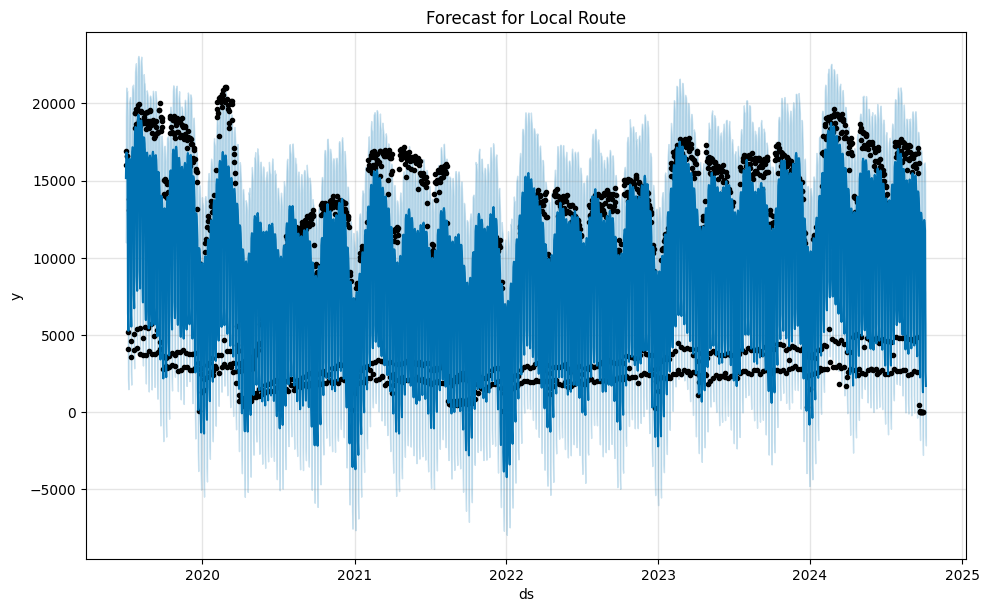

In [ ]:
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)
model.plot(forecast)
plt.title('Forecast for Local Route')
plt.show()